<a href="https://colab.research.google.com/github/moefqy/gmb-tea-leaves-detector/blob/main/gmb_tea_leaves_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GMB Tea Leaves Detection using Convolutional Neural Network (CNN) for TUGAS11: Pemrograman Python
Name: A. Muh. Mufqi Zuhudi <br/>
NIM:  1101208451 <br/>
Class: TTX-44-01 <br/>

#Import Datasets
1. import and mount the resources from google drive
2. checking folders/files at the directory (optional)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


#Import Libraries
1. import keras, numpy, matplotlib, skicit-learn, pillow libraries
2. Checking keras's version

In [ ]:
import os

import keras
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Activation, Dense
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from PIL import Image
from imutils import paths

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)

2.4.3


#Datasets Preparing
1. Define main directory
2. image augmentation
3. print label (optional)
4. convert label to binary
5. print label (optional)
6. prepare train and test data to learned by our model

In [ ]:
base_dir = paths.list_images("/content/drive/MyDrive/Shared with me/gmb_tea_leaves")
data = []
labels = []

In [ ]:
for imagePath in base_dir:
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 32, 32, 3)
(146, 32, 32, 3)


#Model Design
1. set the model as sequential model
2. set compile model
3. checking the model detail
4. train the model using fit function
5. Show the graph between training & Validation from fit function
6. Show model prediction table 

In [ ]:
model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                    BatchNormalization(),
                    Dropout(0.1),
                    MaxPooling2D(2,2),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(5, activation='softmax')])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_316 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_51 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_65 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_258 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_317 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_259 (MaxPoolin (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_116 (Flatten)        (None, 1152)           

In [ ]:
H = model.fit(trainX,
              trainY,
              validation_data=(testX, testY),
              steps_per_epoch=20,
              epochs=40,
              batch_size=16,
              verbose=1)

Epoch 1/40
20/20 [==============================] - 1s 54ms/step - loss: 0.6543 - accuracy: 0.2594 - val_loss: 0.4995 - val_accuracy: 0.2740
Epoch 2/40
20/20 [==============================] - 1s 47ms/step - loss: 0.4252 - accuracy: 0.4677 - val_loss: 0.4952 - val_accuracy: 0.2466
Epoch 3/40
20/20 [==============================] - 1s 45ms/step - loss: 0.3390 - accuracy: 0.6129 - val_loss: 0.4878 - val_accuracy: 0.2603
Epoch 4/40
20/20 [==============================] - 1s 46ms/step - loss: 0.2759 - accuracy: 0.7000 - val_loss: 0.4813 - val_accuracy: 0.3562
Epoch 5/40
20/20 [==============================] - 1s 45ms/step - loss: 0.2416 - accuracy: 0.7323 - val_loss: 0.4732 - val_accuracy: 0.3493
Epoch 6/40
20/20 [==============================] - 1s 46ms/step - loss: 0.2070 - accuracy: 0.7613 - val_loss: 0.4672 - val_accuracy: 0.3493
Epoch 7/40
20/20 [==============================] - 1s 47ms/step - loss: 0.2450 - accuracy: 0.7355 - val_loss: 0.4646 - val_accuracy: 0.5548
Epoch 8/40
20

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


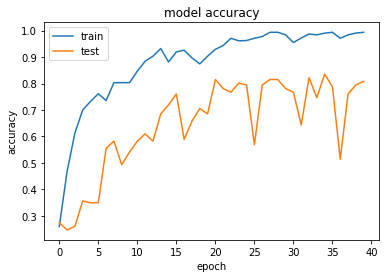

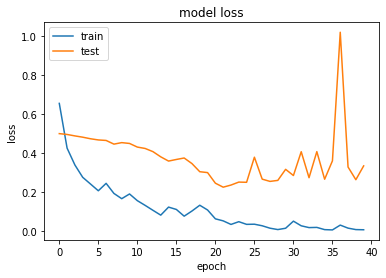

In [ ]:
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_01       0.94      0.52      0.67        33
      GMB_02       0.72      0.92      0.81        25
      GMB_03       0.89      0.85      0.87        20
      GMB_04       0.71      0.90      0.80        41
      GMB_05       0.96      0.89      0.92        27

    accuracy                           0.81       146
   macro avg       0.85      0.82      0.81       146
weighted avg       0.84      0.81      0.80       146



#Predict the Images


In [ ]:
sample='/content/drive/MyDrive/Shared with me/gmb_tea_leaves/GMB_01/IMG_20200814_131553_HDR.jpg'

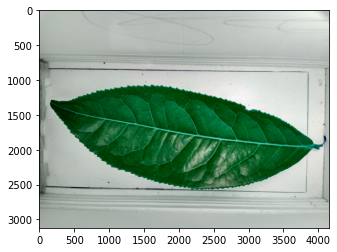

In [ ]:
img_array = cv2.imread(sample)
plt.imshow(img_array)
plt.show()

In [ ]:
image_testing = Image.open('/content/drive/MyDrive/Shared with me/gmb_tea_leaves/GMB_01/IMG_20200814_131553_HDR.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

(32, 32, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 32, 32, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9996209e-01 2.7744461e-05 4.1668104e-06 6.9053520e-08 5.8074911e-06]]
['GMB_01']
